In [15]:
import requests
import base64


def detect_people_or_faces(image_path, task="detect_people"):
    if task == "detect_people":
        url = 'http://localhost:5000/detect_people'
    else:
        url = 'http://localhost:5000/detect_faces'
    objects = []
    # Open the image file in binary mode
    with open(image_path, 'rb') as image_file:
        # Prepare the files and data for the request
        files = {'image': image_file}
        
        try:
            # Send the POST request
            response = requests.post(url, files=files)

            # Check if the request was successful
            if response.status_code == 200:
                # Parse the JSON response
                result = response.json()

                detections = result.get("result", [])
                
                if not detections:
                    print(f"No detections from the image.")
                else:
                    # Iterate over the base64-encoded images
                    for idx, encoded_image in enumerate(detections):
                        # Decode the base64 string
                        image_data = base64.b64decode(encoded_image)
                        objects.append(image_data)
                        
            else:
                # Print the error message from the API
                error_message = response.json().get('error', 'Unknown error')
                print(f"API Error: {error_message}")
        except Exception as e:
            print(f"An error occurred: {e}")
    return objects

In [16]:
people = detect_people_or_faces(
    image_path='men-60744_640.jpg',
    task="detect_people"
)

faces = detect_people_or_faces(
    image_path='men-60744_640.jpg',
    task="detect_faces"
)

In [20]:
from IPython.display import Image

def display_objs(objcs):
    for ob in objcs:
        # Display the image directly
        display(Image(data=ob))

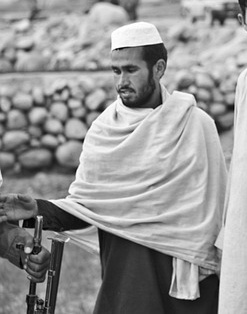

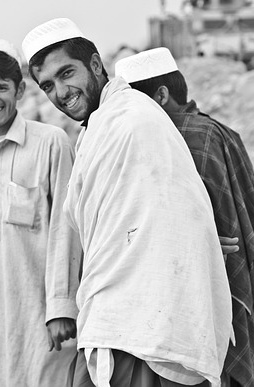

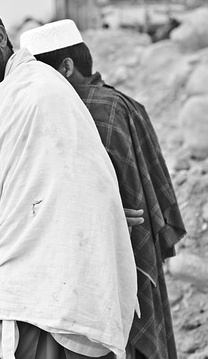

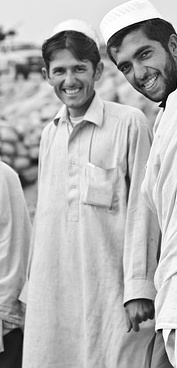

In [21]:
display_objs(people)

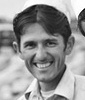

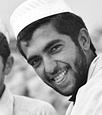

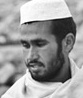

In [22]:
display_objs(faces)